In [2]:
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.options.mode.chained_assignment = None
df=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

# Кластеризация с помощью библиотеки sklearn и метода KMeans

In [3]:
df_cut=df[['Weight','Shoe size','Sex']]
df_cut=df_cut.dropna()
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 185
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Weight     157 non-null    float64
 1   Shoe size  157 non-null    int64  
 2   Sex        157 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.9+ KB


In [10]:
# Задаём дефолтные значения параметров
kmeans=KMeans(n_clusters=2,random_state=1)
# Вызываем метод .fit(), который кластеризует объекты, используя 2 фичи
kmeans.fit(df_cut[['Weight','Shoe size']])
# Добавим новую фичу в таблицу
df_cut['Label']=kmeans.labels_

<AxesSubplot: xlabel='Weight', ylabel='Shoe size'>

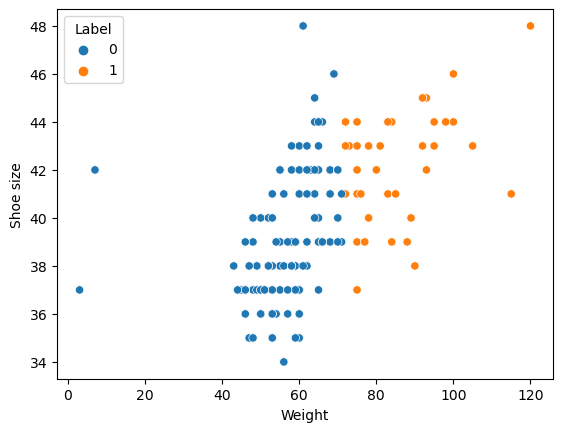

In [11]:
# Выведем результат на экран в виде скаттер плота
sns.scatterplot(data=df_cut,x='Weight',y='Shoe size',hue='Label')

<AxesSubplot: xlabel='Weight', ylabel='Shoe size'>

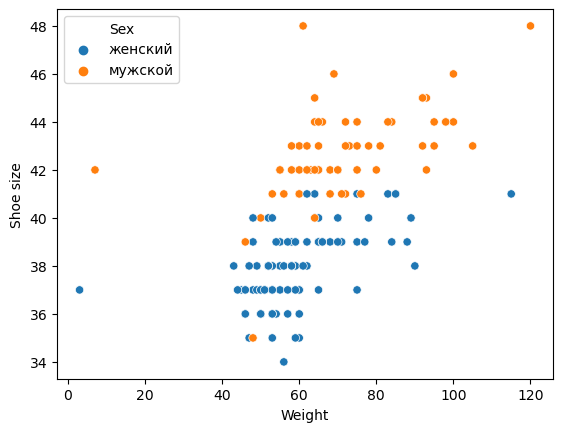

In [9]:
sns.scatterplot(data=df_cut,x='Weight',y='Shoe size',hue='Sex')

# Проверим правильность работы алгоритма, путём подсчёта количества совподающих меток

In [75]:
print(sum((df_cut['Sex']=='мужской')&(df_cut['Label']==0)))
print(sum((df_cut['Sex']=='мужской')&(df_cut['Label']==1)))

print(sum((df_cut['Sex']=='женский')&(df_cut['Label']==1)))
print(sum((df_cut['Sex']=='женский')&(df_cut['Label']==0)))

36
26
13
82


In [76]:
sum([26,82])

108

In [46]:
21+17

38

In [77]:
sum(df_cut['Label']==0)

118